In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = sns.load_dataset("planets")
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


## Method 1
Impute using most frequent

In [7]:
from sklearn.impute import SimpleImputer
df_most_frequent = df.copy()

# Setting strategy to 'most_frequent' to impute by the most frequent values
mean_imputer = SimpleImputer(strategy='most_frequent')
df_most_frequent.iloc[:,:] = mean_imputer.fit_transform(df_most_frequent)

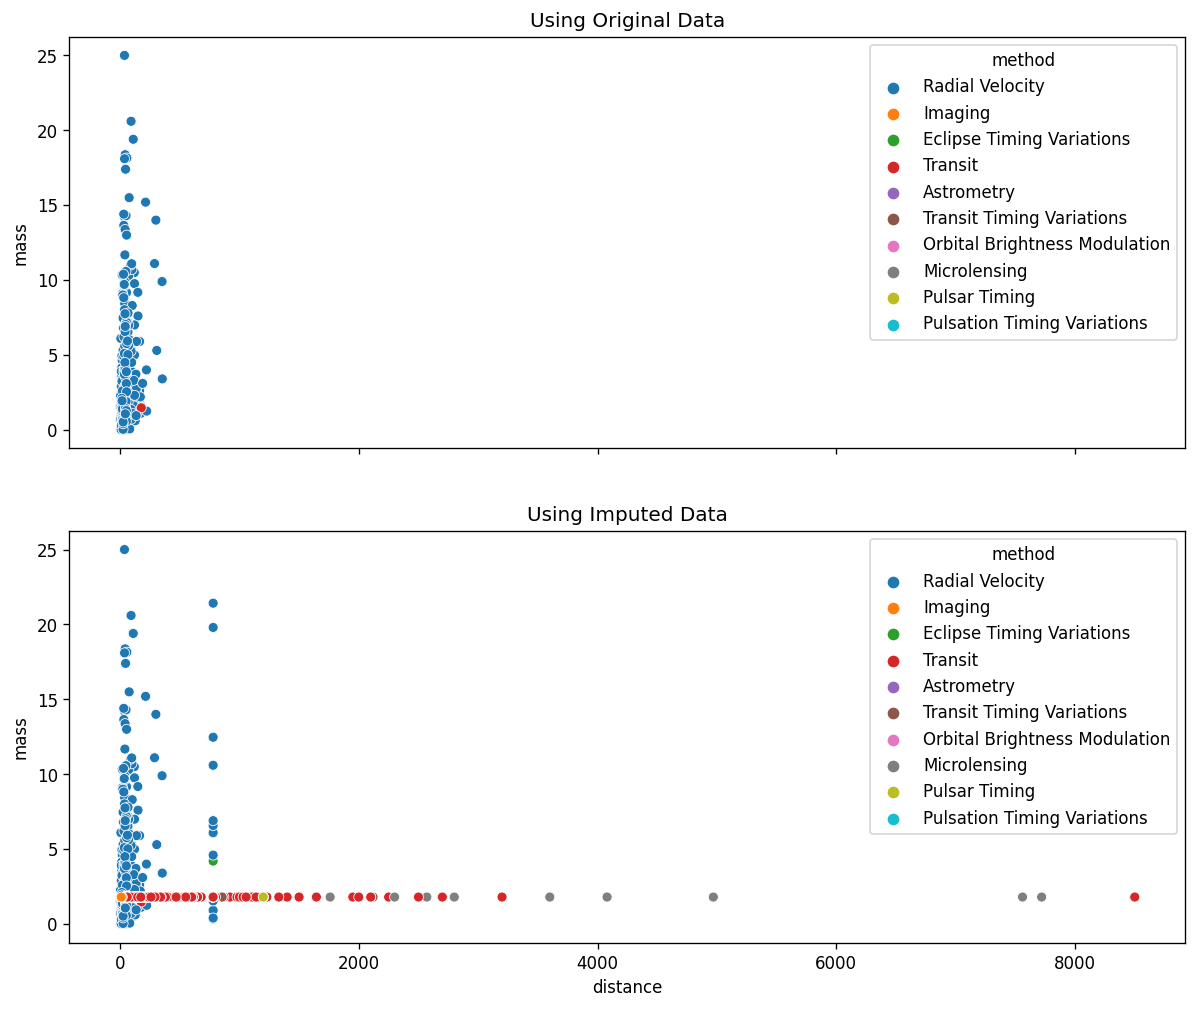

In [16]:
# Plot
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,10), sharey=True, sharex=True, dpi=120)
sns.scatterplot(data=df, x="distance", y="mass", hue="method", ax=ax1)
sns.scatterplot(data=df_most_frequent, x="distance", y="mass", hue="method", ax=ax2)
ax1.set_title('Using Original Data'); ax2.set_title('Using Imputed Data')
plt.show()

## Method 2
Impute using knn

In [24]:
#df.info()
#df_knn.info()

In [25]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer()
df_knn = df.copy()
imputer = KNNImputer(n_neighbors=5)
df_knn[['orbital_period', 'mass', 'distance']] = imputer.fit_transform(df_knn[['orbital_period', 'mass', 'distance']])

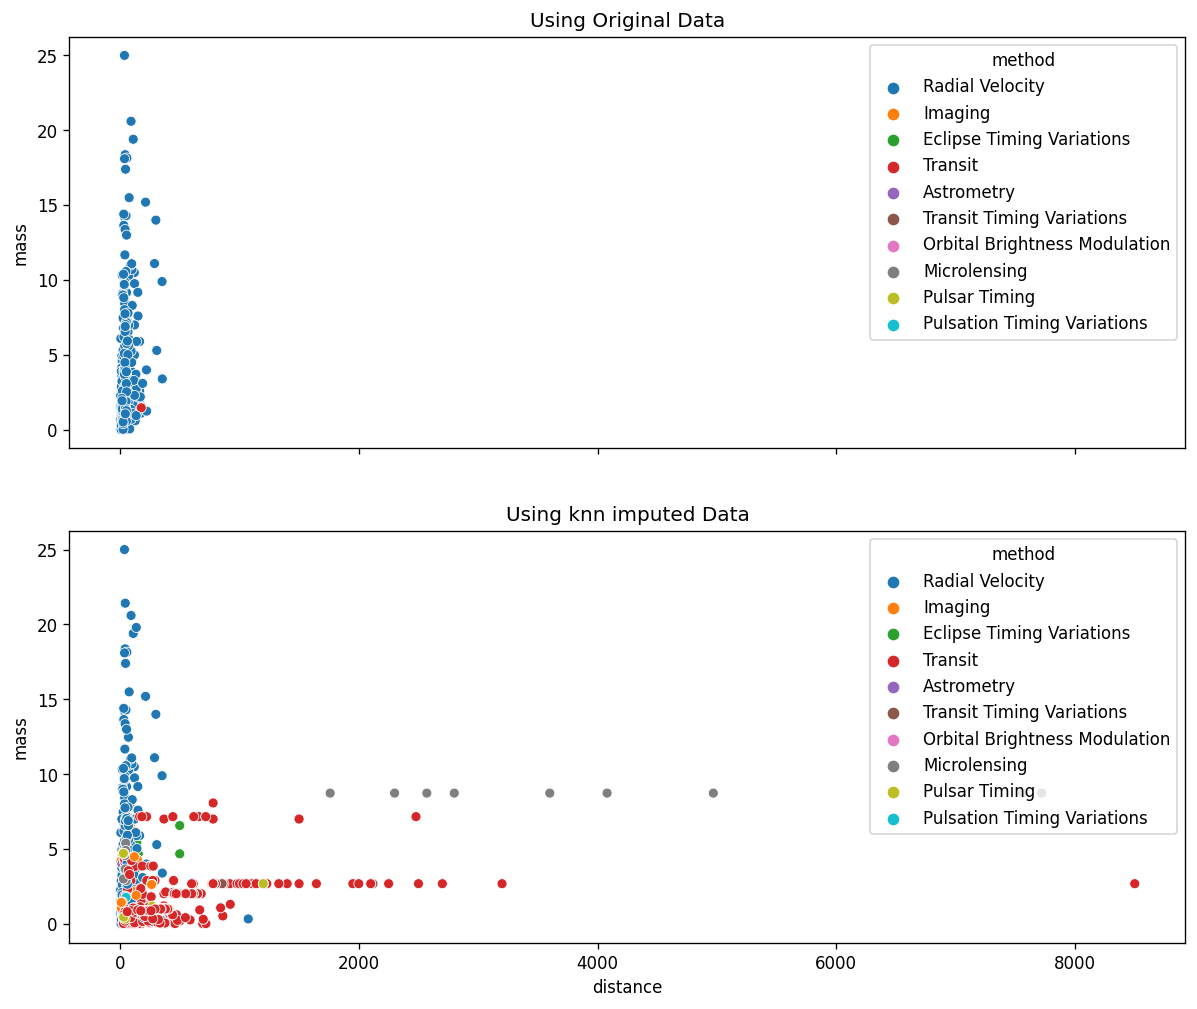

In [26]:
# Plot
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,10), sharey=True, sharex=True, dpi=120)
sns.scatterplot(data=df, x="distance", y="mass", hue="method", ax=ax1)
sns.scatterplot(data=df_knn, x="distance", y="mass", hue="method", ax=ax2)
ax1.set_title('Using Original Data'); ax2.set_title('Using knn imputed Data')
plt.show()

In [10]:
? sns.scatterplot